## Ejercicio de Tarea 03
Véase los datos sobre [precios de viviendas](https://github.com/HaydeePeruyero/MultivariateStatisticalAnalysis/tree/main/data/Precios_de_viviendas.csv).

**a**. Ajustar un modelo de regresión lineal múltiple que relacione el precio de venta con los nueve regresores.

**b**. Probar la significancia de la regresión.¿Qué conclusiones se pueden sacar?

**c**. Usar pruebas t para evaluar la contribución de cada regresor al modelo.

**d**. Calcular $R^2$ y $R^2_{adj}$ para este modelo. 

**e**. ¿Cuál es la contribución del tamaño del lote y el espacio vital para el modelo, dado que se incluyeron todos los demás regresores?.

**f**. En este modelo, ¿la colinealidad es un problema potencial?

**g**. Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?

**h**. Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.

**i**. Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?.

## 0. Importar 

### 0.1. Importar Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import SourcePython as src

### 0.2. Cargar Datos

In [2]:
DatasetViviendas = pd.read_csv(
    './Precios_de_viviendas.csv',
)

TargetLabel , *FeaturesModel = DatasetViviendas.columns

DatasetViviendas.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,29.5,5.0208,1.0,3.531,1.500,2.0,7,4,62,0
1,27.9,4.5429,1.0,2.275,1.175,1.0,6,3,40,0
2,25.9,4.5573,1.0,4.050,1.232,1.0,6,3,54,0
3,29.9,5.0597,1.0,4.455,1.121,1.0,6,3,42,0
4,29.9,3.8910,1.0,4.455,0.988,1.0,6,3,56,0


## **a**. Modelo de Regresión

Al usar el plot de los valores observados (esperados) contra los valores predichos se tiene que no se encuentran tan dispersos respecto a la identidad, esto representa el modelo podría estar bien ajustado (sus estimaciones son buenas).

In [3]:
# Ajuste de Modelo

LinearModel = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel),
    data = DatasetViviendas,
).fit()

LinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     9.037
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           0.000185
Time:                        22:16:40   Log-Likelihood:                -53.541
No. Observations:                  24   AIC:                             127.1
Df Residuals:                      14   BIC:                             138.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9276      5.913      2.525      0.024       2.246      27.609
x1             1.9247      1.030      1.869      0.083      -0.284       4.134
x2             7.0005      4.300      1.628      0.126      -2.223      16.224
x3             0.1492      0.490      0.304      0.765      -0.903       1.201
x4             2.7228      4.360      0.625      0.542      -6.628      12.073
x5             2.0067      1.374      1.461      0.166      -0.939       4.953
x6            -0.4101      2.379     -0.172      0.866      -5.512       4.691
x7            -1.4032      3.396     -0.413      0.686      -8.686       5.879
x8            -0.0371      0.067     -0.557      0.586      -0.180       0.106
x9             1.5594      1.937      0.805      0.434      -2.596       5.715
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.082
Skew:                           0.247   Prob(JB):                        0.582
Kurtosis:                       2.084   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

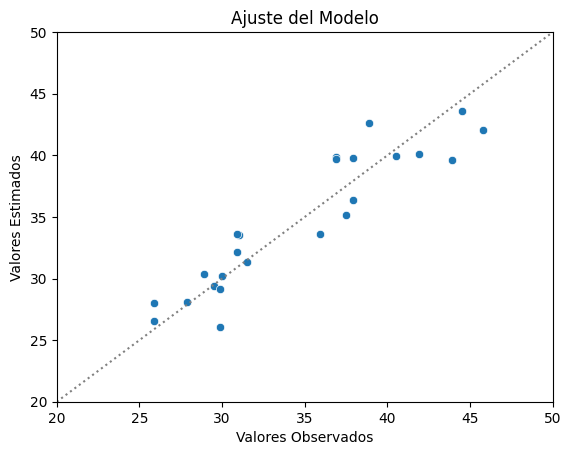

In [4]:
# Plot de los valores esperados (observados) y estimados

fig = src.PlotExpectedEstimate(LinearModel,DatasetViviendas[TargetLabel])
fig.axes[0].set_xlim(20,50)
fig.axes[0].set_ylim(20,50);

## **b**. Prueba de Significancia de la Regresión

Usando la prueba F, se tiene que la regresión es significativa, aunque su estadístico $F_0$ no es notoriamente mayor que $F_1$. Esto significa que aunque el modelo sí genera buena estimaciones, se podría mejorar (eliminando atributos) para que se ajuste de mejor manera a las observaciones.

In [5]:
ANOVA = src.ANOVATable(
    LinearModel,
)

ANOVA

,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,707.298087,9.0,78.588676,9.037027
Residuales,121.748163,14.0,8.696297,NaN
Total,829.046250,23.0,36.045489,NaN


In [6]:
# Calculo del valor estadístico F_1

LevelSignificance = 0.05
F_1 = stats.f.ppf(1-LevelSignificance,*ANOVA['Grados de Libertad'].iloc[:2])

print(f'F_1 :: {F_1}')

F_1 :: 2.6457907352338195


## **c** y **e**. Prueba sobre los Coeficientes Individuales de Regresión

Para todos los estadísticos $t_0$ asociados a cada variable regresora se tiene que no tiene una influencia o contribución significativa al modelo. Pero se tiene que es una regresión significativa, entonces se tiene un problema (conflicto) con algunos de los supuestos del modelo lineal.

In [7]:
# Calculo de valores t_0 y t_1

LevelSignificance = 0.05

src.TestIndividualCoefficients(
    LinearModel,
    DatasetViviendas,
    FeaturesModel,
    LevelSignificance,
)

t_1 :: 2.1447866879169273

t_0 Values
x1 :: 1.8688408296655927
x2 :: 1.627890479889609
x3 :: 0.3042042680251138
x4 :: 0.6245611873880467
x5 :: 1.460991219797703
x6 :: -0.1724263642196211
x7 :: -0.4132581286663472
x8 :: -0.5567915719754749
x9 :: 0.8048774017843509


## **d**. Métricas del Modelo

Se tiene que tiene muy buenas métricas y que se pueden contrastar con el plot en [a. Modelo de Regresión](#a-modelo-de-regresión) en el que no tiene puntos alejados de la recta identidad y la mayoría de ellos están cercas de ésta. Esto explica dos cosas, las métricas alcanzadas y la significancia de la regresión.

In [8]:
# Scores usando el Modelo

print(f'R^2 :: {LinearModel.rsquared}')
print(f'R^2 Adjustada:: {LinearModel.rsquared_adj}')

R^2 :: 0.853146717261346
R^2 Adjustada:: 0.7587410355007829


## **f**. Supuesto de No Colinealidad

Por medio del correolograma se puede apreciar que no se verificaa el supuesto de no multicolinealidad, debido a que varios de los atributos tienen una correlación alta. Esto hace que no las pruebas sobre los coeficientes del modelo no sean significativas aunque la regresión sí lo sea. Lo anterior hace que la colinealidad sea un problema para el modelo.

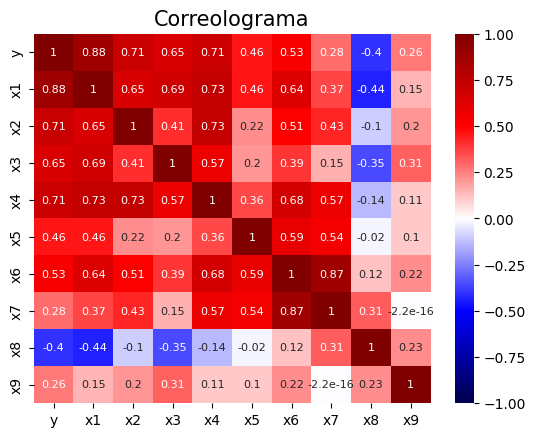

In [9]:
# Plot

fig , axes = plt.subplots()

sns.heatmap(
    DatasetViviendas.corr(),
    vmin = -1,
    vmax = 1,
    cmap = 'seismic',
    annot = True,
    annot_kws = {'size':8},
    ax = axes,
)

axes.set_title('Correolograma',fontsize = 15,);

## **g**. Gráfica de Probabilidad Normal de los Residuales

Se podría suponer que se verifica el supuesto de normalidad, debido a que no existen colas pesadas ni forma de S de manera pronunciada. Y además de que la mayoría de los cuantiles se encuentran alineados respecto a la recta de los cuantiles teóricos.

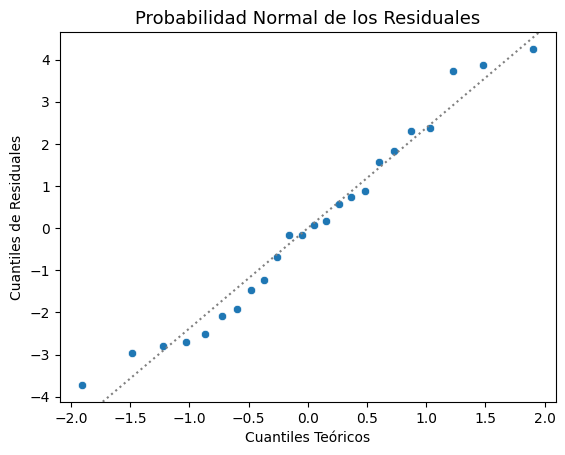

In [10]:
# Plot

_ = src.PlotQQResiduals(LinearModel)

## **h**. Gráfica de los Residuales en Función de la Respuesta Predicha

Como los residuales se encuentran dispersos en un patrón aleatorio se tiene que los mismos verifican con ser homocedásticos, esto hace que se cumpla el supuesto asociado y que los datos sean homocedásticos. Esto favorece a que el modelo esté bien especificado.

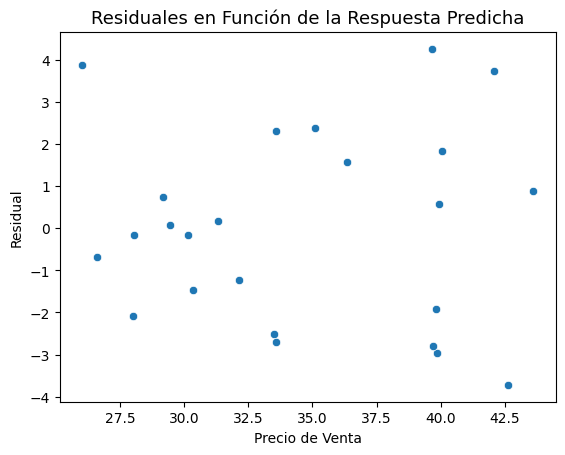

In [11]:
# Plot

_ = src.PlotPredictResiduals(LinearModel,'Precio de Venta')

## **i**. Gráficas de los Residuales en Función de las Variables Regresoras

Para ciertas variables regresoras en el modelo, se tiene que no son homocedásticas respecto a los residuos, esto hace que el modelo no tenga una buena especificación; por lo tanto, se tiene que hay variables que se pueden descartar o eliminar para mejorar la calidad del modelo.

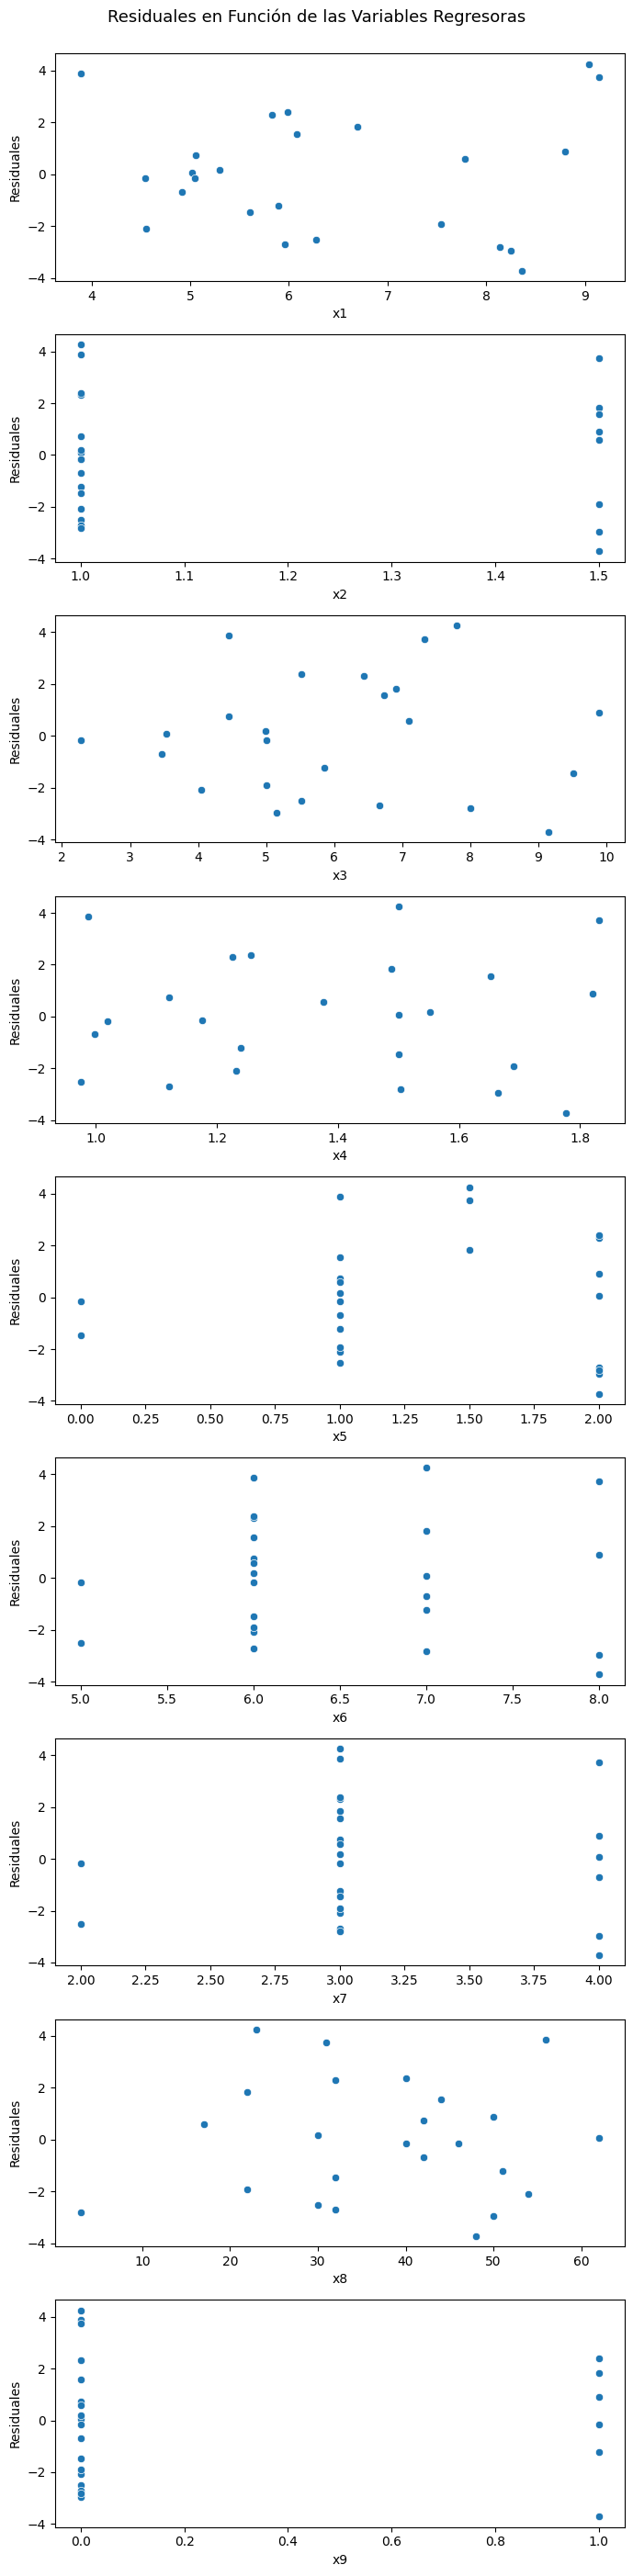

In [12]:
# Plot

_ = src.PlotVariableResiduals(
    LinearModel,
    DatasetViviendas,
    FeaturesModel,
)